# China and Air Pollution in the Korean Peninsula
### Personal Project by Damien Kwon
<p>In recent years, the South Korean public has grown notably more sensitive to the country's volatile air quality as a result of the media's attention to PM2.5 or atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers. According to the US Environmental Protection Agency, prolonged exposure to particulate matter less than 10 micrometers in diameter can lead to premature death, nonfatal heart attacks, decreased lung function, and many other adverse health effects. The graph below depicts global estimates of PM2.5 from 2001-2006.</p>
<p><img src="483910main1_Global-PM2.5-map-670-tsgc7y.jpg" style="width:600px"> </p>
<p>Take note of the heavy concentration in Eastern China and the western coast of the Korean Peninsula. The national media and the government of South Korea have blamed manufacturing activity in China for the seemingly increased concentration of air pollutants in South Korea. The accusation, which has grown politically charged over the years, is based on the fact that most Chinese manufacturing plants are located in Eastern China and that winds in East Asia typically blow towards southeast during cold seasons. The following image is a map of average wind directions over East Asia during winter (November-Febrauary, 2009-2013).</p>
<p><img src="Average-wind-directions-05x05-at-850-hPa-over-East-Asia-during-the-cold-season.png" style="width:600px"> </p>
<p>The Chinese government, on the other hand, has a different opinion. They claim that while it may be true that some of the pollutants from mainland China may be carried over to the Korean Peninsula, a more significant source of the problem lies in the heavily industrial environment of South Korea. Indeed, diesel fuel and coal plants remain main sources of energy in the country today. Although what's most important is for both countries to reduce their respective pollutant emission levels in the future, I was personally intrigued by the subject and was curious to know whether or not China was indeed responsible for a large part of the air pollution crisis in the Koreas. Below is my analysis of the relevant data.</p>

        Date Location  Nitrogen Dioxide(ppm)  Ozone(ppm)  \
0 2019-01-21      강남구                  0.033       0.009   
1 2019-01-21     강남대로                  0.046       0.009   
2 2019-01-21      강동구                  0.042       0.008   
3 2019-01-21     강변북로                  0.050       0.008   
4 2019-01-21      강북구                  0.036       0.011   

   Carbon Monoxide(ppm)  Sulfite Gas(ppm)  PM10(㎍/㎥)  PM2.5(㎍/㎥)  
0                   0.6             0.006       37.0        23.0  
1                   0.7             0.005       42.0        21.0  
2                   0.6             0.005       46.0        26.0  
3                   0.5             0.005       48.0        22.0  
4                   0.7             0.004       53.0        27.0  


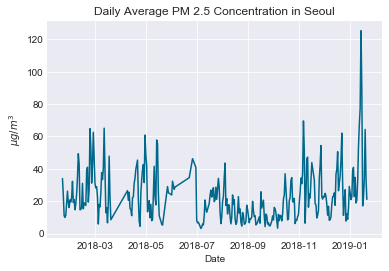

In [1]:
%matplotlib inline

import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
import numpy as np;

sns.set_style("darkgrid")

#Daily average air quality data for different locations in the city of Seoul, South Korea.
#Source: Seoul Database
#http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2218&srvType=S&serviceKind=1&currentPageNo=1
seoul_air = pd.read_csv('daily_avg_air_quality_seoul.csv', parse_dates=['Date'])
print(seoul_air.head())

#Group by dates and aggragate by the numerical mean. Plot only daily average PM2.5.
daily_seoul = seoul_air.groupby(by='Date').agg('mean')
daily_seoul_pm25 = daily_seoul.loc[:, 'PM2.5(㎍/㎥)']

#Plot the daily average PM2.5 concentration in the city of Seoul from Jan 2018 to Jan 2019.
_ = plt.plot(daily_seoul_pm25, c='#00688B')

_ = plt.xlabel('Date')
_ = plt.ylabel('$\mu g/m^3$')
_ = plt.title('Daily Average PM 2.5 Concentration in Seoul')

<p>First, Let's start off with an exploratory data analysis of air quality data for Seoul for last year, provided by the country's weather information service system. Note the peak in the PM2.5 level in January, 2019. An unusually warm winter in the Korean Peninsula trapped fine dust in the peninsula for several days, bringing about serious health concerns in the region. One can also observe approximately seven other observation points above 60㎍/㎥. However, it is difficult to assess the severity of the problem from the above data alone. Below, I've compared average daily PM2.5 pollution levels in Seoul to that of San Francisco.</p>
<p><img src="2013120600699_0.jpg" style="width:500px"> </p>

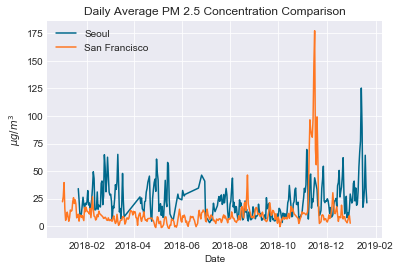

In [2]:
#Daily average PM2.5 concentration level for different locations in the Bay Area, USA.
#Source: USEPA
#https://www.epa.gov/outdoor-air-quality-data/download-daily-data
daily_sf = pd.read_csv('ad_viz_plotval_data.csv', parse_dates=['Date'], index_col='Date')

#Of the many locations in the Bay Area, select San Francisco which most resembles the crowded urban environment of Seoul.
daily_sf_pm25 = daily_sf.loc[daily_sf['Site Name']=='San Francisco', 'Daily Mean PM2.5 Concentration']

#Plot both cities' daily average PM2.5 concentration levels for comparison.
_ = plt.plot(daily_seoul_pm25, c='#00688B')
_ = plt.plot(daily_sf_pm25, c='#FF7722')

_ = plt.xlabel('Date')
_ = plt.ylabel('$\mu g/m^3$')
_ = plt.title('Daily Average PM 2.5 Concentration Comparison')
_ = plt.legend(['Seoul', 'San Francisco'])

<p>The peak in November, 2018 for San Francisco's PM2.5 concentration level was caused by the Camp Fire, "the deadliest and the most destructive wildfire in California history to date". The fire broke out about 140 miles northeast of the Bay Area and is estimated to have burnt around 62,000 ha. Note how close the early 2019 Korean data was to that of San Francisco's during the Camp Fire. As I've mentioned, the peak was only a result of a warmer weather condition.</p>
<p>A brief look at the above graph makes clear that Seoul has a much poorer air quality except for the period between August and October. The World Health Organization guideline stipulates that average daily PM2.5 not exceed 25ug/m3, a level atypical for the Bay Area but often exceeded in Seoul. In fact, PM2.5 concentration level almost never went below 25ug/m3 in June, 2018. This is a source of some serious health concerns.</p>
<p>We now move on to the economic data of China to try to find a relationship between economic activity and air pollution.</p>

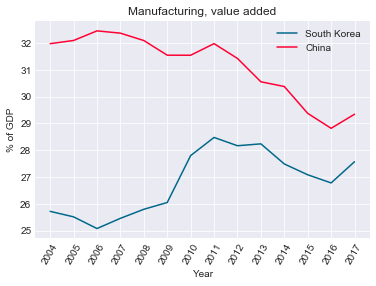

In [3]:
#Index used is 'Manufacturing, value added (% of GDP)'. 
#Source: World Bank
#https://data.worldbank.org/indicator/NV.IND.MANF.ZS?fbclid=IwAR0qCjA7XskO2uA4PAtzcb0XY9CYQwmQyVz_dTQcCiiGEAB1cCtjyC2Kk2Q
manufacturing_percent = pd.read_csv('manufacturing_gdp.csv', skiprows=4, index_col='Country Name').iloc[:, 3:]
china_manufacturing_percent = manufacturing_percent.loc['China'].dropna()
korea_manufacturing_percent = manufacturing_percent.loc['Korea, Rep.', '2004':'2017']
pd.to_datetime(china_manufacturing_percent)
pd.to_datetime(korea_manufacturing_percent)

##Plot both countries' manufacturing output measured as percentage of GDP for comparison.
_ = plt.plot(korea_manufacturing_percent, c='#00688B')
_ = plt.plot(china_manufacturing_percent, c='#ff0033')

_ = plt.xticks(rotation=60)
_ = plt.xlabel('Year')
_ = plt.ylabel('% of GDP')
_ = plt.title('Manufacturing, value added')
_ = plt.legend(['South Korea', 'China'])

<p>Let's explore the data on China's manufacturing industry, which have been repeatedly accused of being responsible for the South Korean air pollution crisis. Many manufacturing processes involve heating raw materials to transform them into more useful forms. Oil refining, for instance, releases sulfur dioxide into the air. Other manufacturing types use heat from coal or diesel furnaces to provide steam power to run the plant, which also release pollutants.</p> 
<p>Above graph depicts annual manufacturing activities of both China and South Korea. By looking at above data, it appears as though manufacturing has become less important in the Chinese economy while the South Koreans have come to rely on it more over the last decade.</p>
<p>This does not, however, mean that the absolute manufacturing activity in China has decreased over the years. Because the measurement unit is in percentage of GDP, it is necessary to multiply the GDP values for respective years to derive the actual dollar output of annual manufacturing activities.</p>

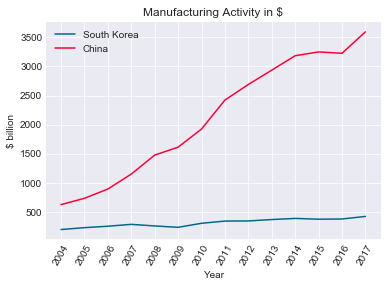

In [4]:
#Historical real GDP from 2004 to 2017 of China and South Korea. Unit in billion dollars. 
#Source: World Bank
china_gdp = np.array([12250.39, 11194.69, 11063.07, 10483.40, 9611.26, 8560.28, 7575.72, 6101.34,
                      5110.25, 4600.59, 3553.82, 2752.68, 2286.69, 1955.35])
korea_gdp = np.array([1531, 1411.25, 1382.76, 1411.33, 1305.60, 1222.81, 1202.46, 1094.50, 901.93,
                      1002.22, 1122.68, 1011.80, 898.14, 764.88])
china_gdp = np.fliplr([china_gdp])[0]
korea_gdp = np.fliplr([korea_gdp])[0]

#Calculate dollar value of manufacturing output for both countries in the time period.
china_manufacturing = (china_manufacturing_percent / 100) * china_gdp
korea_manufacturing = (korea_manufacturing_percent / 100) * korea_gdp

#Plot both countries' manufacturing output measured in dollars for comparison.
_ = plt.plot(korea_manufacturing, c='#00688B')
_ = plt.plot(china_manufacturing, c='#ff0033')

_ = plt.xticks(rotation=60)
_ = plt.xlabel('Year')
_ = plt.ylabel('$ billion')
_ = plt.title('Manufacturing Activity in $')
_ = plt.legend(['South Korea', 'China'])

<p>The graph above makes clear to us that overall manufacturing activity has significantly increased in China, while it has remained relatively stable in South Korea. At this point, it seems natural to hypothesize that if Chinese manufacturing plants are indeed affecting the South Korean air quality, this increase in manufacturing activity in USD must have a meaningful result on Korean air pollution levels. </p>
<p>But such hypothesis assumes that manufacturing activity measured in USD does indeed reflect an increase in the number of manufacturing plants (which we lack the data for) and the resulting pollutant emissions. After all, the question asked is whether or not PM2.5 pollution in China is spilling over to the Koreas. One has to evaluate whether this economic data is relevant to the question asked by comparing the increase in manufacturing activity in USD to China's own air quality data.</p>
<p><img src="5b23c96e1ae66221008b5274-1920-960.jpg" style="width:500px"> </p>

       Site Parameter          Date (LST)  Year  Month  Day  Hour  Value  \
0  Shanghai     PM2.5 2012-01-01 00:00:00  2012      1    1     0  112.0   
1  Shanghai     PM2.5 2012-01-01 01:00:00  2012      1    1     1  113.0   
2  Shanghai     PM2.5 2012-01-01 02:00:00  2012      1    1     2  115.0   
3  Shanghai     PM2.5 2012-01-01 03:00:00  2012      1    1     3  144.0   
4  Shanghai     PM2.5 2012-01-01 04:00:00  2012      1    1     4  152.0   

    Unit Duration QC Name        Date  
0  µg/m³     1 Hr   Valid  2012-01-01  
1  µg/m³     1 Hr   Valid  2012-01-01  
2  µg/m³     1 Hr   Valid  2012-01-01  
3  µg/m³     1 Hr   Valid  2012-01-01  
4  µg/m³     1 Hr   Valid  2012-01-01  


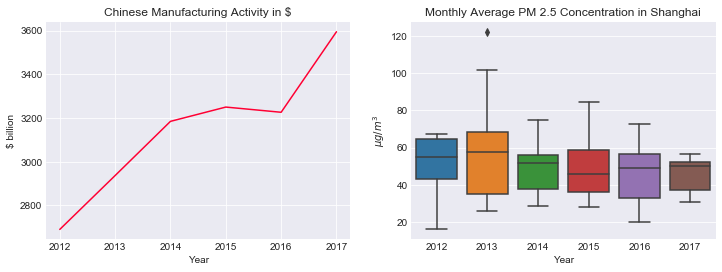

In [5]:
#Hourly PM2.5 Level Data for the city of Shanghai. 2012-2017.
#Source: Berkeley Earth
#http://berkeleyearth.lbl.gov/air-quality/local/China/Shanghai/Shanghai
allFiles = ['Shanghai_2012_HourlyPM25_created20140423.csv', 'Shanghai_2013_HourlyPM25_created20140423.csv', 
          'Shanghai_2014_HourlyPM25_created20150203.csv', 'Shanghai_2015_HourlyPM25_created20160201.csv', 
          'Shanghai_2016_HourlyPM25_created20170201.csv', 'Shanghai_2017_HourlyPM25_created20170803.csv']

#Read in all csv files and concatenate row wise into one pandas DataFrame.
list_ = []
for file_ in allFiles:
   df = pd.read_csv(file_, skiprows=3, parse_dates=['Date (LST)'], index_col=None, encoding='cp1252', na_values=-999)
   list_.append(df)
shanghai_hourly_pm25 = pd.concat(list_, axis = 0, ignore_index = True)

#Create new column 'Date' which doesn't contain time information for easier data manipulation. Print resulting data.
shanghai_hourly_pm25['Date'] = [d.date() for d in shanghai_hourly_pm25['Date (LST)']]
print(shanghai_hourly_pm25.head())

#Group by Date to derive daily average data. Further resampling into monthly average data.
shanghai_daily_pm25 = shanghai_hourly_pm25.groupby(by=['Date']).agg('mean').loc[:, ['Value', 'Year']]
shanghai_daily_pm25.index = pd.to_datetime(shanghai_daily_pm25.index)
shanghai_monthly_pm25 = shanghai_daily_pm25.resample("M").mean()

#Create pyplot figure. Juxtapose Chinese manufacturing output and PM2.5 concentration level in Shanghai.
_ = plt.figure(1, figsize=(12, 4))

_ = plt.subplot(121)
_ = plt.plot(china_manufacturing.iloc[8:], c='#ff0033')
_ = plt.xlabel('Year')
_ = plt.ylabel('$ billion')
_ = plt.title('Chinese Manufacturing Activity in $')

_ = plt.subplot(122)
_ = sns.boxplot(shanghai_monthly_pm25['Year'], shanghai_monthly_pm25['Value'])
_ = plt.xticks([0, 1, 2, 3, 4, 5], [2012, 2013, 2014, 2015, 2016, 2017])
_ = plt.xlabel('Year')
_ = plt.ylabel('$\mu g/m^3$')
_ = plt.title('Monthly Average PM 2.5 Concentration in Shanghai');

<p>Comparing the two data, it is difficult to observe any obvious relationship between manufacturing activity measured in dollar output and PM2.5 concentration level in the city of Shanghai. Manufacturing output has increased dramatically (from roughly 2.6 trillion to 3.6 trillion) but the mean PM2.5 concentration appears to have slightly decreased in the five year period. One can think of several explanations to the finding. </p>

1. Manufacturing is irrelevant to PM2.5 concentration.
2. Other factors are acting against the increase in pollutant emissions by the manufacturing plants. 
3. GDP measurement does not capture the actual amount of manufacturing activity. 

<p>At any rate, data does not support the South Korean government's claim that the increasing manufacturing activities are the main source of air pollution in the Korean Peninsula, and it seems superflous to compare the Chinese manufacturing output data to that of the South Korean air pollution. This is separate, however, from the claim that the air pollution crisis in China is affecting the Koreas. Let's now directly compare Shanghai's air quality to that of Seoul.</p>

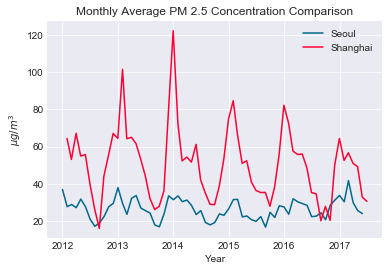

In [6]:
#Monthly average air quality data for different locations in the city of Seoul, South Korea.
#Source: Seoul Database
#http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2217&srvType=S&serviceKind=1&currentPageNo=1
seoul_monthly = pd.read_csv('monthly_avg_air_quality_seoul.csv', parse_dates=['Date'], index_col='Date')

#Group by date to find the mean of different locations in Seoul. Choose only data from Jan 2012 to June 2017 for comparison.
seoul_monthly = seoul_monthly.groupby(by='Date').agg('mean')
seoul_monthly_pm25 = seoul_monthly.loc['201201':'201706', 'PM2.5(㎍/㎥)']
seoul_monthly_pm25.index = pd.to_datetime(seoul_monthly_pm25.index, format='%Y%m')

#Plot PM2.5 concentration levels for both Seoul and Shanghai in the same time frame for comparison.
_ = plt.plot(seoul_monthly_pm25, c='#00688B')
_ = plt.plot(shanghai_monthly_pm25['Value'], c='#ff0033')

_ = plt.xlabel('Year')
_ = plt.ylabel('$\mu g/m^3$')
_ = plt.title('Monthly Average PM 2.5 Concentration Comparison');
_ = plt.legend(['Seoul', 'Shanghai'])

<p>Contrary to popular belief, neither Seoul nor Shanghai has observed an increasing rate of air pollution in the last five years. Nonetheless, PM2.5 level in Shanghai appear to be correlated to that of Seoul. The PM2.5 concentration level in Seoul follows the trends shown in Shanghai, both increasing in the winter and decreasing in the summer, but in a much weaker intensity for Seoul. Let's try a regression analysis of the two cities' data.</p>

slope:  0.1632034682813107
95% confidence interval:  [0.1248974  0.24202599]
intercept:  18.247236432336624
95% confidence interval:  [15.05376892 20.33900872]


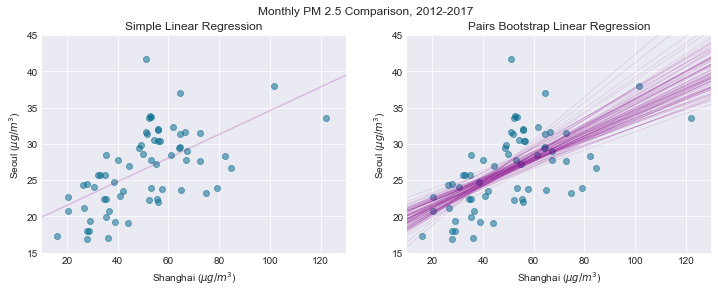

In [7]:
fig = plt.figure(1, figsize=(12, 4))
_ = fig.suptitle('Monthly PM 2.5 Comparison, 2012-2017')

#Draw scatter plot of corresponding PM2.5 levels in Shanghai and Seoul.
_ = plt.subplot(121)
_ = plt.axis([10, 130, 15, 45])
_ = plt.scatter(shanghai_monthly_pm25['Value'], seoul_monthly_pm25, c='#00688B', alpha=0.5)

#Find slope and intercept of simple linear regression line for PM2.5 data.
slope, intercept = np.polyfit(shanghai_monthly_pm25['Value'], seoul_monthly_pm25, 1)
x_val = np.array([10, 130])
y_val = slope * x_val + intercept

#Plot simple regression line.
_ = plt.plot(x_val, y_val, c='#8B008B', alpha=0.2);

_ = plt.xlabel('Shanghai ($\mu g/m^3$)')
_ = plt.ylabel('Seoul ($\mu g/m^3$)')
_ = plt.title('Simple Linear Regression')

#Perform pairs bootstrap for linear regression. 
#Source: DataCamp.
def draw_bs_pairs_linreg(x, y, size=1):

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

#Draw second scatter plot of corresponding PM2.5 levels in Shanghai and Seoul.
_ = plt.subplot(122)
_ = plt.axis([10, 130, 15, 45])
_ = plt.scatter(shanghai_monthly_pm25['Value'], seoul_monthly_pm25, c='#00688B', alpha=0.5)

#Find slopes and intercepts for 100 rounds of bootstrap regression.
bs_slope, bs_intercept = draw_bs_pairs_linreg(shanghai_monthly_pm25['Value'], seoul_monthly_pm25, 100)
slope_conf_int = np.percentile(bs_slope, [2.5, 97.5])
intercept_conf_int = np.percentile(bs_intercept, [2.5, 97.5])

#Plot all bootstrap regression lines.
for i in range(100):
    bs_y_val = bs_slope[i] * x_val + bs_intercept[i]
    _ = plt.plot(x_val, bs_y_val, linewidth=0.5, c='#8B008B', alpha=0.2)
    
_ = plt.xlabel('Shanghai ($\mu g/m^3$)')
_ = plt.ylabel('Seoul ($\mu g/m^3$)')
_ = plt.title('Pairs Bootstrap Linear Regression')

#Print slope and intercept for simple regression. 
#Print 95% confidence interval for bootstrap regression.
print('slope: ', slope)
print('95% confidence interval: ', slope_conf_int)
print('intercept: ', intercept)
print('95% confidence interval: ', intercept_conf_int)

<p>Above are scatter plots of monthly PM2.5 concentration levels in the two cities between Jan 2012 and June 2017. On the left is a simple linear regression between the two variables, with Pearson's r equal to approximately 0.1632. This represents a positive relationship between the two variables. On the right are one hundred, pairs bootstrap linear regressions on Pearson's r between the two variables conducted to make up for the limited sample size. Note that Pearson's r is always positive within the 95% confidence interval. This is represented by the positively sloped lines drawn in purple.</p>

p-value:  0.0


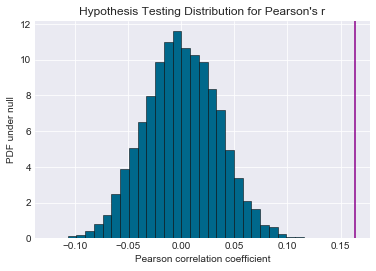

In [50]:
# Initialize permutation replicates: perm_replicates.
perm_replicates = np.empty(10000)

# Draw replicates.
for i in range(10000):
    # Permute Seoul's PM2.5 measurments: seoul_pm25_permuted.
    seoul_pm25_permuted = np.random.permutation(seoul_monthly_pm25)

    # Compute Pearson correlation.
    ht_slope, ht_intercept = np.polyfit(shanghai_monthly_pm25['Value'], seoul_pm25_permuted, 1)
    perm_replicates[i] = ht_slope

# Compute p-value: p.
p = np.sum(perm_replicates >= slope) / len(perm_replicates)
print('p-value: ', p)

#Draw histogram of hypothesis testing distribution of correlation coefficients.
#Plot observed correlation coefficient for comparison.
_ = plt.hist(perm_replicates, density=True, bins=30, color='#00688B', edgecolor='black', linewidth=0.5)
_ = plt.axvline(x=0.1632, c='#8B008B')
_ = plt.xlabel('Pearson correlation coefficient')
_ = plt.ylabel('PDF under null')
_ = plt.title('Hypothesis Testing Distribution for Pearson\'s r')

<p>Here is a hypothesis test result with the assumption that there is no zero correlation between PM2.5 level in Shanghai and in Seoul. Note that in the 10,000 permutation tests conducted, not once was the actual correlation coefficient of 0.1632 (vertical line in purple) observed as a result of chance. This yields a p value of 0 and is indicative of a significant relationship between the two cities' air pollution levels. </p>

<p>It is not, however, statistically sound to conclude from this data that China has significant influence on the PM2.5 concentration level in the Korean Peninsula. Correlation simply tells us the strength to which one set of data moves in the same direction as the other, and makes no statement regarding causality. But it is one of many potential explanations for the positive relationship. Other alternative explanations include increased buring of wood and coal during colder seasons, less overall movement of air in lower temperatures, or such combinations.</p>

<p><img src="69230_14565_1435.jpg" style="width:500px"> </p>

<p>Regretably, the data offered no definitive answer to which degree China was responsible for the air pollution crisis in the Korean Peninsula. However, one was able to observe a significant relationship between the air quality of Seoul and Shanghai, and also dismiss certain misinformed claims such as the rising level of PM2.5 concentration in East Asia or the effect of the increasing manufacturing industry in China. More robust research is needed before making further conclusions, but it is important to remind ourselves that objectivity is key for the benefit of both countries in all circumstances.</p>